因為前面報告的題目，沒有做到預測或分類，所以我重新換了個題目，從網路上找了教學並重新作一次!!
題目是利用線性回歸做黃金價格的預測。

In [1]:
from sklearn.linear_model import LinearRegression

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn

這邊要install "pandas-datareader" 才可以

In [5]:
from pandas_datareader import data as pdr

In [6]:
import fix_yahoo_finance as yf

讀取過去10年的資料，資料欄位有價格的開盤，收盤，高低價等

In [7]:
Df = yf.download('GLD','2008-01-01','2017-12-31')

[*********************100%***********************]  1 of 1 downloaded


In [8]:
Df.head

<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2007-12-31   82.739998   82.830002   81.980003   82.459999   82.459999   
2008-01-02   83.559998   85.139999   83.440002   84.860001   84.860001   
2008-01-03   84.870003   85.940002   84.599998   85.570000   85.570000   
2008-01-04   85.339996   85.550003   84.430000   85.129997   85.129997   
2008-01-07   85.239998   85.260002   84.570000   84.769997   84.769997   
2008-01-08   86.279999   87.129997   86.160004   86.779999   86.779999   
2008-01-09   86.559998   87.199997   86.300003   86.550003   86.550003   
2008-01-10   86.419998   88.459999   86.410004   88.250000   88.250000   
2008-01-11   88.040001   88.760002   87.849998   88.580002   88.580002   
2008-01-14   89.449997   89.940002   89.000000   89.540001   89.540001   
2008-01-15   89.599998   90.349998   87.910004   87.989998   87.989998   
2008-01-

重新定義收盤價格，並除去空值

In [13]:
Close_Df=Df['Close'].dropna()

In [15]:
Close_Df.head(10)

Date
2007-12-31    82.459999
2008-01-02    84.860001
2008-01-03    85.570000
2008-01-04    85.129997
2008-01-07    84.769997
2008-01-08    86.779999
2008-01-09    86.550003
2008-01-10    88.250000
2008-01-11    88.580002
2008-01-14    89.540001
Name: Close, dtype: float64

<function matplotlib.pyplot.show>

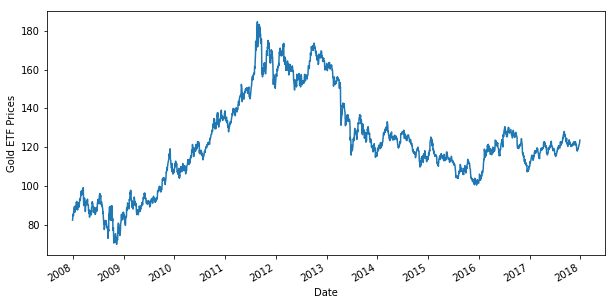

In [18]:
Close_Df.plot(figsize=(10,5))
plt.ylabel("Gold ETF Prices")
plt.show

S_3:代表過去三天的價格移動平均值
S_9:代表過去九天的價格移動平均值
存在X中

In [20]:
Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean()

Df['S_9']= Df['Close'].shift(1).rolling(window=9).mean()

Df= Df.dropna()

X = Df[['S_3','S_9']]

X.head

<bound method NDFrame.head of                    S_3         S_9
Date                              
2008-01-14   87.793335   85.883333
2008-01-15   88.790001   86.670000
2008-01-16   88.703334   87.017777
2008-01-17   88.076665   87.143333
2008-01-18   87.063332   87.295555
2008-01-22   86.873332   87.590000
2008-01-23   87.363332   87.744444
2008-01-24   87.826665   87.893333
2008-01-25   88.713333   88.096666
2008-01-28   89.423335   88.287777
2008-01-29   90.710002   88.533333
2008-01-30   91.066668   88.884444
2008-01-31   91.653333   89.480000
2008-02-01   91.536667   90.024445
2008-02-04   90.936666   90.238889
2008-02-05   89.949999   90.342222
2008-02-06   88.709999   90.318889
2008-02-07   88.576665   90.193333
2008-02-08   88.826665   90.143333
2008-02-11   89.933332   90.059999
2008-02-12   90.726667   90.079999
2008-02-13   90.553335   89.776666
2008-02-14   90.033335   89.558889
2008-02-15   89.493334   89.598889
2008-02-19   89.433334   89.604445
2008-02-20   90.146668   

這是要預測的黃金價格!叫做Y

In [21]:
y = Df['Close']

y.head

<bound method NDFrame.head of Date
2008-01-14     89.540001
2008-01-15     87.989998
2008-01-16     86.699997
2008-01-17     86.500000
2008-01-18     87.419998
2008-01-22     88.169998
2008-01-23     87.889999
2008-01-24     90.080002
2008-01-25     90.300003
2008-01-28     91.750000
2008-01-29     91.150002
2008-01-30     92.059998
2008-01-31     91.400002
2008-02-01     89.349998
2008-02-04     89.099998
2008-02-05     87.680000
2008-02-06     88.949997
2008-02-07     89.849998
2008-02-08     91.000000
2008-02-11     91.330002
2008-02-12     89.330002
2008-02-13     89.440002
2008-02-14     89.709999
2008-02-15     89.150002
2008-02-19     91.580002
2008-02-20     93.239998
2008-02-21     93.250000
2008-02-22     93.389999
2008-02-25     92.739998
2008-02-26     93.709999
                 ...    
2017-11-16    121.400002
2017-11-17    122.860001
2017-11-20    121.309998
2017-11-21    121.510002
2017-11-22    122.629997
2017-11-24    122.320000
2017-11-27    122.830002
2017-11-28    1

#X_train 和y_train是訓練數據集。

#X_test & y_test是測試數據集。

In [34]:
t=0.8

t = int(t*len(Df))

print(t)

# Train dataset

X_train = X[:t]

y_train = y[:t]

# Test dataset

X_test = X[t:]

y_test = y[t:]

2008


利用線性回歸預測後plot出來，然後y_test是實際的情況

In [40]:
linear = LinearRegression().fit(X_train, y_train)

<function matplotlib.pyplot.show>

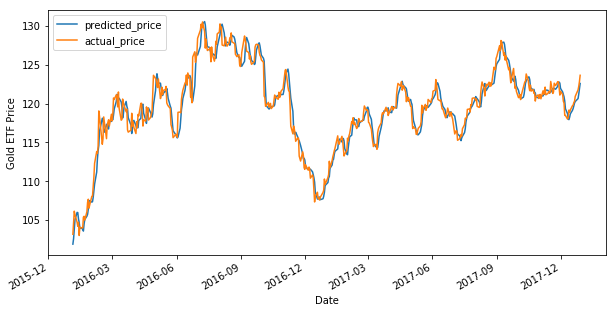

In [46]:
predicted_price = linear.predict(X_test)

predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])

predicted_price.plot(figsize=(10,5))

y_test.plot()

plt.legend(['predicted_price','actual_price'])

plt.ylabel("Gold ETF Price")

plt.show

最後計算出模型的解釋黃金價格的能力

In [45]:
r2_score = linear.score(X[t:],y[t:])*100

float("{0:.2f}".format(r2_score))

94.91